In [1]:
from main import Value 

In [2]:
a = 2.0
b = -3.0
c = 10.0 
fn = lambda a,b,c: a*b+c 
print(fn(a,b,c)) 

4.0


In [38]:
# https://en.wikipedia.org/wiki/Derivative 
# df/da = (f(a+h)-f(a))/h for infinitessimally small h 
h = 0.0001 
print('slope:', (fn(a+h,b,c) - fn(a,b,c)) / h)

slope: Value(-3.0000E+00)


In [4]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
d = fn(a,b,c); d.label = 'd'
print(d)

Value(4.0000E+00)


In [5]:
d._op, d._prev

('+', {Value(-6.0000E+00), Value(1.0000E+01)})

In [6]:
def trace(root):
    nodes, edges = set(), set() 
    def build(v):
        if v not in nodes: 
            nodes.add(v) 
            for child in v._prev: 
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges 

In [7]:
nodes, edges = trace(d)
print(f'{len(nodes)=} {len(edges)=}')

len(nodes)=5 len(edges)=4


In [8]:
from graphviz import Digraph # type: ignore
# sudo apt install graphviz 
def draw_dot(root): 
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label=f'{n.label} | data={n.data:.2E} | grad={n.grad:.4f}', shape='record')
        if n._op: 
            dot.node(name=uid+n._op, label=n._op)
            dot.edge(uid+n._op,uid)
    
    for n1, n2 in edges: 
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot 

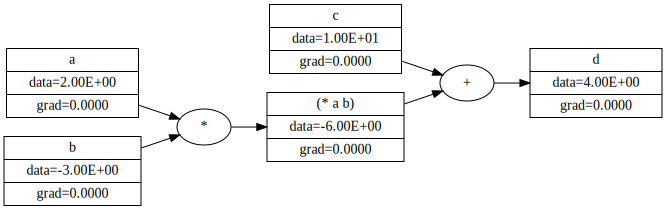

In [9]:
draw_dot(d)

In [22]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
d = fn(a,b,c); d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; 
L.label = 'L'
print(L)

Value(-8.0000E+00)


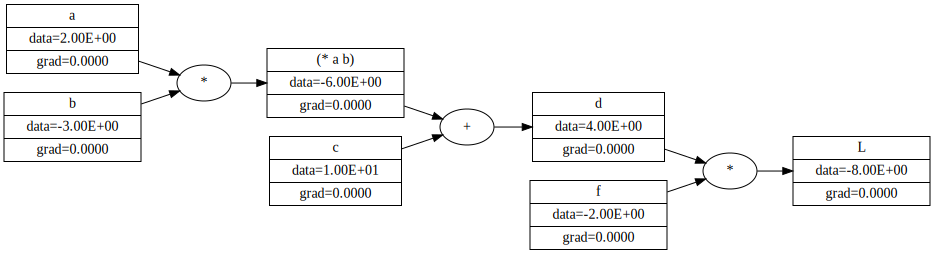

In [23]:
draw_dot(L)

In [48]:
def forward_pass(a,b,c,d,f):
    d = fn(a,b,c); d.label = 'd'
    L = d*f; 
    L.label = 'L'
    return L
L = forward_pass(a,b,c,d,f)
Ld = forward_pass(a, b, c, d+h, f)
La = forward_pass(a+h, b, c, d, f)
Lb = forward_pass(a, b+h, c, d, f)
Lc = forward_pass(a, b, c+h, d, f)
Lf = forward_pass(a, b, c, d, f+h)

In [49]:
dL_wrt_dx = lambda L2, L1: (L2 - L1) / h
print(f'{dL_wrt_dx(L+h, L)=}')
print(f'{dL_wrt_dx(Ld, L)=}')
print(f'{dL_wrt_dx(Lf, L)=}')
print(f'{dL_wrt_dx(La, L)=}')
print(f'{dL_wrt_dx(Lb, L)=}')
print(f'{dL_wrt_dx(Lc, L)=}')

dL_wrt_dx(L+h, L)=Value(1.0000E+00)
dL_wrt_dx(Ld, L)=Value(0.0000E+00)
dL_wrt_dx(La, L)=Value(6.0000E+00)
dL_wrt_dx(Lb, L)=Value(-4.0000E+00)
dL_wrt_dx(Lc, L)=Value(-2.0000E+00)
dL_wrt_dx(Lf, L)=Value(4.0000E+00)


```
dL/dL = ((L+h)-L) / h = 1 
dL/dd = ((d+h)*f - d*f) / h = f 
dL/df = d 

dL/dc = dL/dd * dd/dc = f * d/dc (a*b+c) = f*1 = f = -2

let e = a*b
dL/de = dL/dd * dd/de = f * d/de (e+c) = f*1 = f = -2 

dL/da = dL/dd * dd/de * de/da = f * 1 * d/da (a*b) = f*b = -2*-3 = 6
dL/db  = f*a = -4 
```

In [41]:
((d+h)*f - L)/h 

Value(-2.0000E+00)